# Dashboard dan Presentasi

tautan google drive yang berisi tautan dashboard dan presentasi sebagai berikut: https://drive.google.com/drive/folders/1Fnu4pzg4eV8fFldsm1SA2kpO2hEtsV7z?usp=sharing

# Analisis Range Produk pada Toko Online Everyday Plus

Pada proyek ini, project manager yang bertanggung jawab pada range produk ingin mengetahui tentang produk - produk yang termasuk rentang utama (main range) dan rentang sekunder (secondary range) agar pelanggan bisa mendapatkan penawaran produk sekunder yang relevan dan bisa mengoptimasi pengadaan barang. Dalam analisis ini, akan dilihat berbagai hasil analisis data yang akan menjawab pertanyaan - pertanyaan sehingga jawaban tersebut bisa dipresentasikan kepada project manager. 

Beberapa hipotesis yang dikemukakan sebagai berikut:
- Terdapat perbedaan harga barang antara kategori produk paling menguntungan dengan kategori produk yang kurang menguntungkan
- Terdapat perbedaan jumlah barang yang dibeli antara kategori produk paling menguntungkan dengan kategori produk yang kurang menguntungkan

Rangkaian kegiatan pada proyek ini meliputi: Pra pemrosesan yang meliputi pemanggilan library dan pemanggilan dataset, eksplorasi data awal, pemrosesan data, analisis data, pengujian hipotesis, dan diakhiri dengan kesimpulan

## Pra-pemrosesan

### Pemanggilan library

Pertama akan dipanggil library yang akan digunakan pada pengerjaan proyek ini

In [182]:
#pemanggilan library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [183]:
import warnings
warnings.filterwarnings('ignore')

### Pemanggilan dataset

Selanjutnya akan dipanggil dataset yang akan digunakan pada proyek ini

In [184]:
#pemanggilan dataset
try:
    df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')
except:
    df = pd.read_csv('D:/kerja/practicum/sprint 13/ecommerce_dataset_us.csv', sep='\t')

### Eksplorasi data awal

Setelah memanggil dataset, dilakukan pengeksplorasian data pada dataset. Dataset memiliki kolom sebagai berikut:

In [185]:
#pengecekan jumlah data pada dataset
df.shape

(541909, 7)

In [186]:
#pemanggilan informasi sekilas mengenai dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Dari cuplikan data dapat terlihat bahwa terdapat beberapa hal yang akan dilakukan pemrosesan agar data bisa semakin lebih baik. Pertama judul kolom akan diubah agar menjadi lower_case untuk memudahkan pemrosesan dan penganalisisan data. Lalu kolom `InvoiceDate` akan diubah menjadi tipedata datetime agar data mudah dilakukan analisa. Selanjutnya akan dilihat apakah terdapat nilai yang hilang dan duplikat.

In [187]:
#mengetahui jumlah data yang memiliki nilai yang hilang jika ada
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
dtype: int64

In [188]:
(df.isnull().sum().sort_values(ascending=False)/df.shape[0]).map('{:,.2%}'.format)

CustomerID     24.93%
Description     0.27%
InvoiceNo       0.00%
StockCode       0.00%
Quantity        0.00%
InvoiceDate     0.00%
UnitPrice       0.00%
dtype: object

Dari data dapat terlihat bahwa terdapat 2 kolom yang mengalam nilai yang hilang, yakni `CustomerID` sekitar 25% dari keseluruhan data dan `Description` sekitar 0,27% dari keseluruhan data. Akan dianalisis apakah nilai yang hilang merupakan nilai hilang yang terdapat pola atau tidak.

### Analisa akan nilai yang hilang

Pertama akan dilihat nilai yang hilang untuk kolom `CustomerID`. Dilihat persebaran data untuk kolom `Quantity` yang mengandung nilai yang hilang dan keseluruhan data

In [189]:
df[df['CustomerID'].isnull()]['Quantity'].value_counts(normalize=True).map('{:,.2%}'.format).head(10)

1     55.46%
2     17.64%
3      7.53%
4      4.66%
5      2.67%
6      2.35%
7      1.20%
8      1.10%
10     0.80%
12     0.76%
Name: Quantity, dtype: object

In [190]:
df['Quantity'].value_counts(normalize=True).map('{:,.2%}'.format).head(10)

1     27.35%
2     15.10%
12    11.27%
6      7.54%
4      7.10%
3      6.85%
24     4.43%
10     4.11%
8      2.42%
5      2.17%
Name: Quantity, dtype: object

Dikarenakan data yang cukup banyak, maka akan sulit untuk melihat keseluruhan pesebaran data. Namun dari cuplikan 5 data diatas bisa dilihat bahwa terdapat pesebaran yang cukup mirip antara data nilai yang hilang maupun nilai keseluruhan. Untuk memastikan kembali akan dilihat untuk kolom lain, kali ini akan dilihat untuk kolom `InvoiceNo`

In [191]:
df[df['CustomerID'].isnull()]['InvoiceNo'].value_counts(normalize=True).map('{:,.2%}'.format).head(10)

573585    0.82%
581219    0.55%
581492    0.54%
580729    0.53%
558475    0.52%
579777    0.51%
581217    0.50%
537434    0.50%
580730    0.49%
538071    0.48%
Name: InvoiceNo, dtype: object

In [192]:
df['InvoiceNo'].value_counts(normalize=True).map('{:,.2%}'.format).head(10)

573585    0.21%
581219    0.14%
581492    0.13%
580729    0.13%
558475    0.13%
579777    0.13%
581217    0.12%
537434    0.12%
580730    0.12%
538071    0.12%
Name: InvoiceNo, dtype: object

Sekali lagi dapat dilihat bahwa terdapat pesebaran data yang mirip antara nilai yang hilang dengan keseluruhan data. Yang artinya tidak ada nilai yang hilang yang mendominasi.

Selanjutnya akan dilakukan analisa untuk kolom `Description`. Pertama akan dilihat pada kolom `Quantity`

In [193]:
df[df['Description'].isnull()]['Quantity'].value_counts(normalize=True).map('{:,.2%}'.format).head(10)

 1    8.67%
-1    5.02%
 2    4.54%
-2    3.58%
-5    2.75%
-3    2.41%
 3    2.27%
-6    2.06%
-4    1.99%
 5    1.86%
Name: Quantity, dtype: object

In [194]:
df['Quantity'].value_counts(normalize=True).map('{:,.2%}'.format).head(10)

1     27.35%
2     15.10%
12    11.27%
6      7.54%
4      7.10%
3      6.85%
24     4.43%
10     4.11%
8      2.42%
5      2.17%
Name: Quantity, dtype: object

Lalu untuk kolom `StockCode`

In [195]:
df[df['Description'].isnull()]['StockCode'].value_counts(normalize=True)

35965     0.006878
23084     0.006878
22084     0.006190
22451     0.004127
22501     0.003439
            ...   
16169P    0.000688
84846A    0.000688
82545A    0.000688
84251F    0.000688
85175     0.000688
Name: StockCode, Length: 960, dtype: float64

Dari kedua data diatas dapat terlihat bahwa terdapat pesebaran data untuk nilai yang hilang. Dapat terlihat bahwa nilai yang hilang pada kolom `Description` juga merupakan nilai yang hilang bersifat acak, dengan tidak ada nilai hilang yang memiliki suatu pola atau satu data lebih menonjol dibandingkan data lainnya. Sehingga dapat disimpulkan bahwa nilai yang hilang pada dataset merupakan nilai yang hilang bersifat acak.

### Analisa akan data duplikat

Selanjutnya akan dilihat untuk nilai duplikat pada dataset

In [196]:
#mengetahui jumlat data yang memiliki nilai duplikat jika ada
print('Jumlah data yang mengandung nilai duplikat adalah:', df.duplicated().sum())
print('Presentase data yang mengandung nilai duplikat adalah: {:.2%}'.format(df.duplicated().sum()/df.shape[0]))

Jumlah data yang mengandung nilai duplikat adalah: 5268
Presentase data yang mengandung nilai duplikat adalah: 0.97%


Terdapat 5268 data duplikat, atau sekitar 0,97% dari data keseluruhan total. Akan dilakukan analisa lebih lanjut terhadapa data duplikat tersebut.

### Analisa untuk kesalahan lainnya pada data

Selain itu dari cuplikan data didapat bahwa terdapat nilai negatif pada kolom `Quantity` dan `Unit Price`.

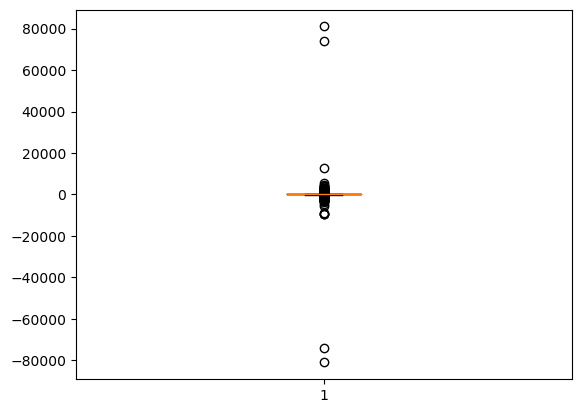

In [197]:
plt.boxplot(df['Quantity'])
plt.show()

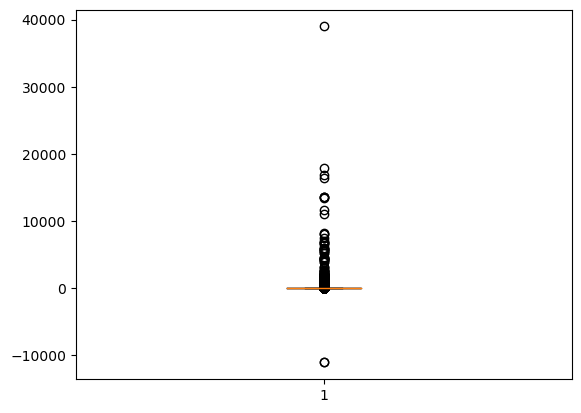

In [198]:
plt.boxplot(df['UnitPrice'])
plt.show()

Dapat dilihat untuk grafik boxplot, bahwa terbanyak banyak sekali outliers atau whiskers yang hingga mencapai 80000 dan -80000 untuk kolom `Quantity` dan -10000 hingga 40000 untuk kolom `UnitPrice`. Dan seharusnya data penjualan menunjukan data dengan nilai positif bukan nilai negatif. Sehingga perlu untuk dilakukan pemfilteran data sehingga hanya diperoleh data diluar outliers dan data dengan nilai positif.

### Kesimpulan sementara

Dari eksplorasi data awal, didapatkan kesimpulan sebagai berikut:
- Perlu untuk mengubah judul kolom menjadi lower_case
- Terdapat 2 kolom yang mengandung nilai hilang, yakni kolom `CustomerID` dan `Description`. Kedua kolom ini mengandung nilai hilang bersifat acak
- Terdapat 0,97% dari keseluruhan data yang mengandung nilai duplikat. Nilai duplikat dapat terlihat dari data id kustomer, nama barang, id invoice yang sama namun memiliki kuantitas yang berbeda
- Data pada kolom `Quantity` dan `UnitPrice` mengandung nilai negatif dan nilai outliers.

## Pemrosesan Data

Setelah dilakukan pengeksplorasian data awal, dilakukan pemrosesan data. 

### Perbaikan judul kolom & pengubahan tipe data

Pertama akan dilakukan perbaikan judul kolom agar menjadi lower_case untuk memudahkan proses analisa

In [199]:
df.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


Selanjutnya diubah tipedata dari `invoice_date`

In [200]:
df['invoice_date'] = df['invoice_date'].astype('datetime64[m]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


### Nilai yang hilang

#### kolom `customer_id`

Karena akan dilakukan proses analisa pada tahap selanjutnya, nilai yang hilang perlu diproses. Pertama dilakukan pemrosesan untuk nilai yang hilang pada `customer_id`

In [201]:
df[df['customer_id'].isnull()].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN


 Dapat dilihat bahwa terdapat pembelian dan harga per barang. Untuk menghindari kerancuan dalam proses analisa berikutnya namun disaat yang bersamaan nilai yang hilang pada kolom `customer_id` hampir 25% dari keseluruhan data dan id kustomer adalah angka, maka nilai yang hilang pada `customer_id` akan diganti menjadi 0.

In [202]:
df['customer_id'] = df['customer_id'].fillna(0)
df['customer_id'].isnull().sum()

0

#### Kolom `description`

Selanjutnya dilakukan pengisian untuk kolom `description`

In [203]:
df[df['description'].isnull()].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,0.0
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,0.0
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,0.0
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,0.0
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,0.0


Dari cuplikan data diatas dapat terlihat bahwa memang terdapat barang terjual, namun tidak ada harga yang pasti dan tidak ada id kustomer. Namun perlu dilihat terlebih dahulu apakah memang semua data yang memiliki nilai yang hilang pada kolom `description` tidak memiliki nilai harga barang dan id pelanggan

In [204]:
print('Jumlah data yang mengandung nilai hilang pada kolom description namun memiliki nilai barang:', df[(df['description'].isnull()) & (df['unit_price'] > 0)]['invoice_no'].count())
print('Jumlah data yang mengandung nilai hilang pada kolom description namun memiliki id kustomer:', df[(df['description'].isnull()) & (df['unit_price'] > 0)]['invoice_no'].count())

Jumlah data yang mengandung nilai hilang pada kolom description namun memiliki nilai barang: 0
Jumlah data yang mengandung nilai hilang pada kolom description namun memiliki id kustomer: 0


Selanjutnya akan diambil contoh pula untuk salah satu barang yang tidak memiliki `description`. 

In [205]:
df[df['stock_code'] == '22139'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2018-11-29 09:41:00,4.25,15311.0
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,0.0
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.00,0.0
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2018-12-01 14:27:00,11.02,0.0
7203,537011,22139,NaN,-5,2018-12-01 15:38:00,0.00,0.0


Dapat dilihat bahwa semua nilai yang hilang pada `description` juga memiliki nilai 0 pada `unit_price` maupun `customer_id`. Selain itu terdapat kemungkinan pula dalam satu barang memiliki harga yang berbeda pula. Untuk mencegah kerancuan lebih lanjut dan jumlah data yang hilang ini kurang dari 1 % dari keseluruhan data, maka nilai yang hilang pada kolom `description` akan dihapus.

In [206]:
df= df.dropna(subset=['description']).reset_index(drop=True)
df.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
dtype: int64

### Nilai duplikat

Selanjutnya akan dilakukan pemrosesan untuk nilai duplikat. 

In [207]:
df[df.duplicated(keep=False)].head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0


Dari cuplikan data diatas dapat dilihat bahwa data sama persis satu sama lain, maka akan dihapus untuk nilai duplikat ini

In [208]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

Namun akan dilihat pula untuk data apabila hanya melihat nomor invoice, kode stock, dan id pelanggan saja.

In [209]:
df[df.duplicated(subset=['invoice_no', 'stock_code', 'invoice_date', 'customer_id'], keep=False)].head(7)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
113,536381,71270,PHOTO CLIP LINE,1,2018-11-29 09:41:00,1.25,15311.0
125,536381,71270,PHOTO CLIP LINE,3,2018-11-29 09:41:00,1.25,15311.0
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2018-11-29 11:45:00,6.35,17908.0
491,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,1,2018-11-29 11:45:00,2.10,17908.0
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2018-11-29 11:45:00,6.35,17908.0
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2018-11-29 11:45:00,2.10,17908.0
524,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2018-11-29 11:45:00,6.35,17908.0


In [210]:
print('Jumlah data yang mengandung nilai duplikat apabila hanya melihat invoice, stock_code, tanggal invoice, dan id customer adalah:', df[df.duplicated(subset=['invoice_no', 'stock_code', 'invoice_date', 'customer_id'])]['invoice_no'].count())
print('Presentase data yang mengandung nilai duplikat apabila hanya melihat invoice, stock_code, tanggal invoice, dan id customer adalah: {:.2%}'.format(df[df.duplicated(subset=['invoice_no', 'stock_code', 'invoice_date', 'customer_id'])]['invoice_no'].count()/df.shape[0]))

Jumlah data yang mengandung nilai duplikat apabila hanya melihat invoice, stock_code, tanggal invoice, dan id customer adalah: 5409
Presentase data yang mengandung nilai duplikat apabila hanya melihat invoice, stock_code, tanggal invoice, dan id customer adalah: 1.01%


Dari cuplikan data yang merupakan data duplikat dapat terlihat bahwa terdapat data penjualan dengan kuantitas yang sama maupun kuantitas yang berbeda dengan nomor invoice, barang, tanggal, dan id kustomer yang sama. Ada kemungkinan bahwa adanya data duplikat disebabkan beberapa hal. Pertama server mencatat data hanya pada saat kustomer memasukan ke keranjang belanja, kustomer melakukan pembelian dua barang sama dengan perbedaan kurang dari 1 menit, kesalahan server, dll. Untuk itu diasumsikan bahwa pelanggan benar - benar membeli barang dengan jumlah kuantitas terbesar. Selanjutnya akan dilakukan penghapusan nilai duplikat namun tetap mempertahankan nilai quantitas paling besar

In [211]:
#mengurutkan dari kuantitas terbesar, lalu menghapus duplikat dengan hanya melihat invoice, kode stock, tanggal, dan id pelanggan
df = df.sort_values('quantity', ascending=False).drop_duplicates(['invoice_no', 'stock_code', 'invoice_date', 'customer_id']).sort_index()
df = df.reset_index(drop=True)
#mengecek apakah data duplikat telah terhapus
df[(df['invoice_no'] == '536381') & (df['stock_code'] == '71270')]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
124,536381,71270,PHOTO CLIP LINE,3,2018-11-29 09:41:00,1.25,15311.0


### Pemrosesan kolom `quantity` dan `unit_price`

Sebelumnya telah disebutkan bahwa pada kolom `quantity` dan `unit_price` terdapat nilai negatif dan juga nilai yang sangat besar. Penyebab kemungkinan terdapatnya nilai negatif maupun outlier ada banyak hal. Contohnya adalah penginputan data yang salah, kesalahan server, dll. Pertama dilihat berapa banyak yang mengandung nilai negatif ini

In [212]:
print('Jumlah nilai negatif pada quantity adalah:', df[df['quantity'] < 0]['invoice_no'].count())
print('Persentase nilai negatif pada quantity terhadap keseluruhan data adalah:{:.2%}'.format(df[df['quantity'] < 0]['invoice_no'].count()/df.shape[0]))
print('Jumlah nilai negatif pada unit_price adalah:', df[df['unit_price'] < 0]['invoice_no'].count())

Jumlah nilai negatif pada quantity adalah: 9613
Persentase nilai negatif pada quantity terhadap keseluruhan data adalah:1.81%
Jumlah nilai negatif pada unit_price adalah: 2


Terdapat sekitar 1,81% dari keseluruhan data yang mengandung nilai negatif pada `quantity` dan 2 data saja yang mengandung nilai negatif pada `unit_price`. Akan diubah agar nilai negatif ini menjadi positif

In [213]:
df['quantity'] = df['quantity'].abs()
df['unit_price'] = df['unit_price'].abs()

Selanjutnya akan dilihat kurva boxplot dan histogram untuk kolom `quantity` dan `unit_price`

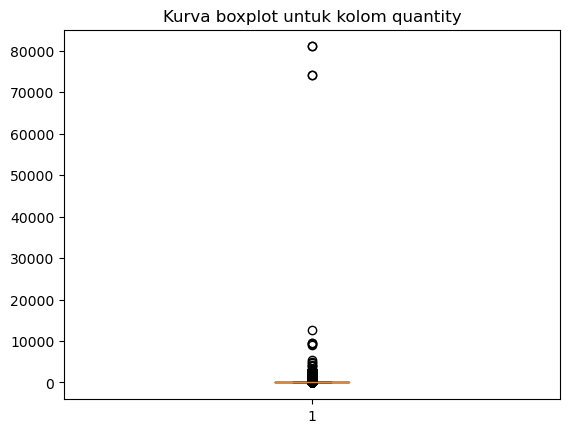

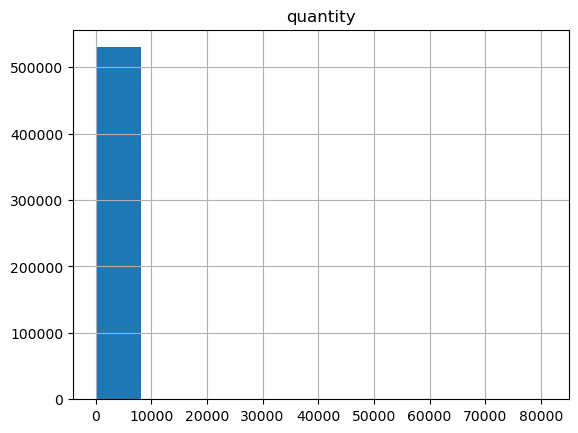

In [214]:
plt.boxplot(df['quantity'])
plt.title('Kurva boxplot untuk kolom quantity')
print()
df.hist('quantity', bins = 10)
plt.show()

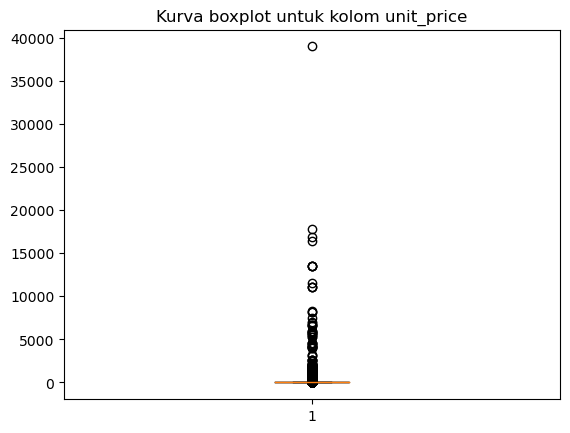

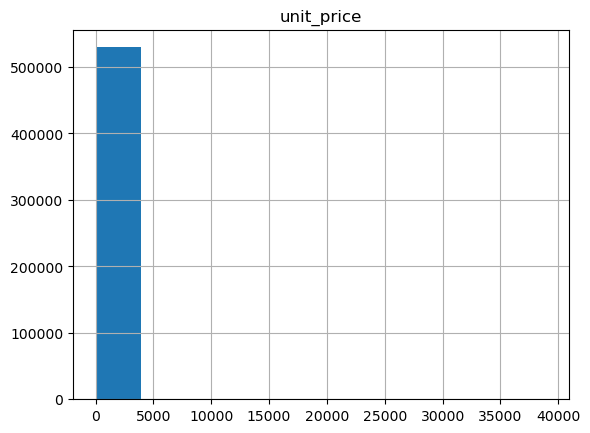

In [215]:
plt.boxplot(df['unit_price'])
plt.title('Kurva boxplot untuk kolom unit_price')
print()
df.hist('unit_price', bins = 10)
plt.show()

Selanjutnya akan dicari batas atas dan bawah outlier sebagai bahan pertimbangan

In [216]:
#fungsi outliers_upper untuk mencari batas atas outlier dari kolom yang akan ditentukan
def outliers_upper(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    
    return q3 + 1.5*IQR
columns = ('quantity', 'unit_price')
for column_name in columns:
    print('batas atas outlier', column_name, 'adalah', outliers_upper(column_name))

batas atas outlier quantity adalah 28.5
batas atas outlier unit_price adalah 8.45


Dapat dilihat bahwa batas atas outlier untuk kolom `quantity` adalah 28,5 dan kolom `unit_price` adalah 8.45. Selanjutnya akan dicari batas bawah outlier

In [217]:
#fungsi outliers_upper untuk mencari batas bawah outlier dari kolom yang akan ditentukan
def outliers_lower(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    
    return q1 - 1.5*IQR
columns = ('quantity', 'unit_price')
for column_name in columns:
    print('batas bawah outlier', column_name, 'adalah', outliers_lower(column_name))

batas bawah outlier quantity adalah -15.5
batas bawah outlier unit_price adalah -3.0700000000000003


Dapat dilihat bahwa batas bawah outlier untuk kolom `quantity` adalah -15.5 dan batas bawah outlier untuk kolom `unit_price` adalah -3.07. Namun dikarenakan semua angka telah menjadi positif dan untuk mengurangi kesalahan data akibat kesalahan penulisan, maka batas bawah outlier kolom `quantity` dan `unit_price` lebih dari 0. Untuk batas atas outlier, hanya akan dihapus untuk kolom `quantity` saja, dikarenakan secara logika masih masuk akan untuk menghapus jumlah barang diatas 28,5 buah. Namun dikarenakan masih adanya barang yang dijual diatas 8,45 dan akan dilakukan pengkategorian barang, sehingga apabila akan dihapus harga barang diatas batas atas outlier maka akan menghilangkan sebagian barang yang ada

In [218]:
df_quantity_clean = df[(df['quantity'] > 0) & (df['quantity'] < outliers_upper('quantity'))]
df_clean = df_quantity_clean[
    df_quantity_clean['unit_price'] > 0]
df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501394 entries, 0 to 529777
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    501394 non-null  object        
 1   stock_code    501394 non-null  object        
 2   description   501394 non-null  object        
 3   quantity      501394 non-null  int64         
 4   invoice_date  501394 non-null  datetime64[ns]
 5   unit_price    501394 non-null  float64       
 6   customer_id   501394 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.6+ MB


,quantity,unit_price,customer_id
count,501394.000000,501394.000000,501394.000000
mean,5.907332,4.900723,11302.416263
std,6.304940,100.329083,6872.710144
min,1.000000,0.001000,0.000000
25%,1.000000,1.250000,0.000000
50%,3.000000,2.100000,14298.000000
75%,10.000000,4.150000,16229.000000
max,28.000000,38970.000000,18287.000000


Selanjutnya akan dilihat kurva boxplot dan histogram data yang untuk kolom `quantity` telah difilter

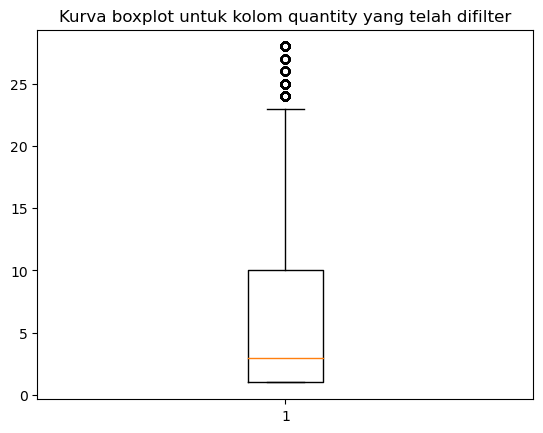

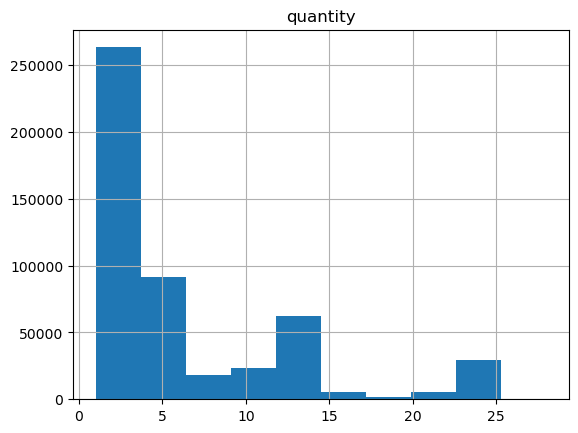

In [219]:
plt.boxplot(df_clean['quantity'])
plt.title('Kurva boxplot untuk kolom quantity yang telah difilter')
print()
df_clean.hist('quantity', bins = 10)
plt.show()

Dan dilihat jumlah data yang berkurang setelah dilakukan pemfilteran

In [220]:
print('Jumlah data yang difilter karena termasuk dalam outliers:',df.shape[0] - df_clean.shape[0] )
print('Persentase jumlah data yang difilter karena termasuk dalam outliers:{:.2%}'.format((df.shape[0] - df_clean.shape[0])/df.shape[0]))

Jumlah data yang difilter karena termasuk dalam outliers: 28384
Persentase jumlah data yang difilter karena termasuk dalam outliers:5.36%


### Kesimpulan Sementara

Telah dilakukan pemrosesan data, dengan kegiatan sebagai berikut:
- Perbaikan judul kolom
- Perbaikan tipe data
- Pemrosesan nilai yang hilang
- Pemrosesan nilai duplikat
- Pemrosesan nilai outliers

## Analisa data eksploratif

Setelah dilakukan pemrosesan data, akan dilakukan penganalisaan terhadap data. Terdapat dua bagian utama, yakni analisa revenue perusahaan dan analisa rentang produk perusahaan

### Analisa revenue perusahaan

#### Tren Revenue

Pertama akan dilihat tren revenue yang dimiliki toko. Pertama akan ditambahkan kolom baru untuk mencatat hanya tanggal saja

In [221]:
df_clean['invoice_day'] = df['invoice_date'].dt.date
df_clean.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29


Lalu ditambahkan pula kolom `income` yakni hasil perkalian dari `quantity` dan `unit_price`

In [222]:
df_clean['income'] = df_clean['quantity'] * df_clean['unit_price']
df_clean.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_day,income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34


Lalu dibuat dataframe baru

In [223]:
revenue = df_clean.groupby('invoice_day')['income'].sum().reset_index()
revenue.head()

,invoice_day,income
0,2018-11-29,35955.30
1,2018-11-30,28330.62
2,2018-12-01,31291.46
3,2018-12-03,25276.00
4,2018-12-04,43914.13


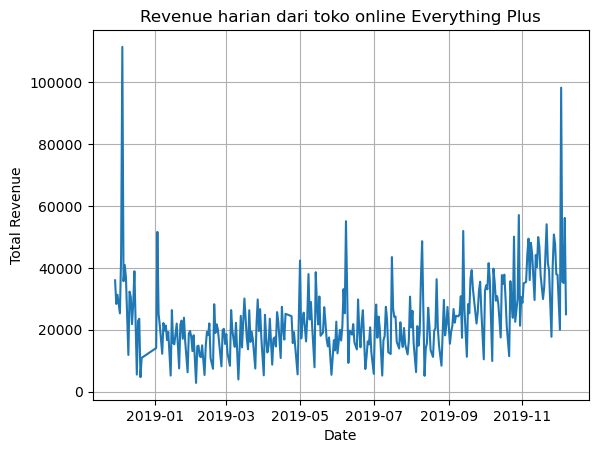

In [224]:
ax = sns.lineplot(data=revenue,
             x='invoice_day',
             y='income')
ax.set_xlabel('Date')
ax.set_ylabel('Total Revenue')
ax.set_title('Revenue harian dari toko online Everything Plus')
ax.grid(True)

plt.show()

In [225]:
revenue.sort_values('income', ascending=False).head()

,invoice_day,income
5,2018-12-05,111403.73
300,2019-12-03,98233.50
270,2019-10-29,57052.07
303,2019-12-06,56118.16
149,2019-06-08,55063.61


Dari grafik, walaupun terdapat banyak puncak - puncak yang sangat tinggi dibandingkan hari - hari sebelumnya dapat terlihat bahwa pada akhir tahun 2018 ke awal tahun 2019 terjadi penurunan revenue, lalu pendapatan stabil walau berfluktuatif hingga menjelang akhir tahun perlahan namun pasti terjadi kenaikan revenue. Dari grafik, revenue harian sangat berfluktuatif walaupun dapat terlihat trend. Selain itu dapat terlihat bahwa total revenue harian tertinggi jatuh pada tanggal 5 Desember 2018 dan 3 Desember 2019.

#### Rata - rata besar pembelian dan tren yang dimiliki

Selanjutnya akan dilihat rata - rata besar pembelian dan tren yang dimiliki berdasarkan tanggal pembelian. Pertama akan dicari jumlah pengguna unik per hari

In [226]:
unique_users = df_clean.groupby('invoice_day')['customer_id'].nunique().reset_index()
unique_users.head()

,invoice_day,customer_id
0,2018-11-29,91
1,2018-11-30,110
2,2018-12-01,48
3,2018-12-03,74
4,2018-12-04,87


Lalu akan digabungkan dataset `unique_users` dan `revenue`

In [227]:
revenue_unique = pd.merge(revenue, unique_users, on='invoice_day')
revenue_unique.head()

,invoice_day,income,customer_id
0,2018-11-29,35955.30,91
1,2018-11-30,28330.62,110
2,2018-12-01,31291.46,48
3,2018-12-03,25276.00,74
4,2018-12-04,43914.13,87


Dari sini akan ditambahkan kolom `average_revenue` dan akan dibuat grafik untuk mengetahui tren rata - rata besar pembelian

In [228]:
revenue_unique['average_revenue'] = revenue_unique['income']/revenue_unique['customer_id']
revenue_unique.head()

,invoice_day,income,customer_id,average_revenue
0,2018-11-29,35955.30,91,395.113187
1,2018-11-30,28330.62,110,257.551091
2,2018-12-01,31291.46,48,651.905417
3,2018-12-03,25276.00,74,341.567568
4,2018-12-04,43914.13,87,504.760115


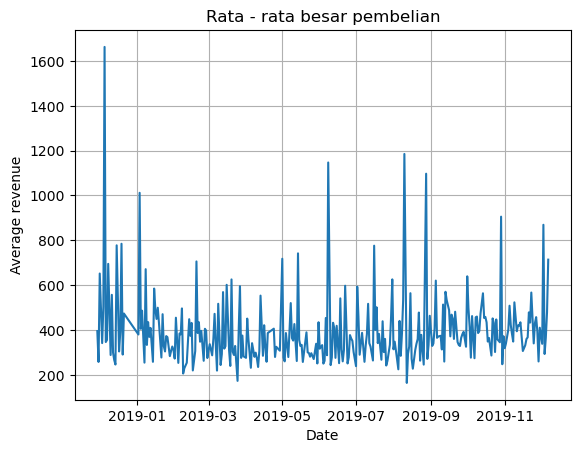

In [229]:
ax = sns.lineplot(data=revenue_unique,
             x='invoice_day',
             y='average_revenue')
ax.set_xlabel('Date')
ax.set_ylabel('Average revenue')
ax.set_title('Rata - rata besar pembelian')
ax.grid(True)

plt.show()

In [230]:
revenue_unique.sort_values('average_revenue', ascending=False).head()

,invoice_day,income,customer_id,average_revenue
5,2018-12-05,111403.73,67,1662.742239
203,2019-08-10,48596.36,41,1185.277073
149,2019-06-08,55063.61,48,1147.158542
217,2019-08-28,29624.34,27,1097.197778
21,2019-01-03,51609.38,51,1011.948627


Dari grafik dapat terlihat bahwa tren rata - rata besar pembelian cenderung stabil. Namun terdapat beberapa tanggal dimana rata - rata besar pembelian yang dimiliki menjadi sangat besar. Tanggal 5 Desember 2018 selain menjadi total revenue harian terbesar juga merupakan rata - rata revenue per pelanggan terbesar pula, lalu diikuti oleh tanggal 10 Agustus 2019 dan 8 Juni 2019.

#### Rata - rata revenue per pelanggan per bulan dan tren yang dimiliki

Selanjutnya akan dilihat rata - rata revenue per pelanggan per bulan dan tren nya. Pertama akan ditambahkan kolom bulan untuk dataset utama yang telah difilter dari outlier

In [231]:
df_clean['invoice_month'] = df_clean['invoice_date'].dt.to_period("M")
df_clean['invoice_month'] = df_clean['invoice_month'].dt.to_timestamp()
df_clean.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_day,income,invoice_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,15.30,2018-11-01
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34,2018-11-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29,22.00,2018-11-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34,2018-11-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34,2018-11-01


Selanjutnya akan dilakukan pembuatan tabel baru yang berisi bulan, total pendapatan, dan jumlah pengguna unik serta rata - rata revenue per pengguna.

In [232]:
revenue_month = df_clean.groupby('invoice_month')['income'].sum().reset_index()
month_user = df_clean.groupby('invoice_month')['customer_id'].nunique()
revenue_user_month = pd.merge(revenue_month, month_user, on='invoice_month')
revenue_user_month['average_revenue'] = revenue_user_month['income']/revenue_user_month['customer_id']
revenue_user_month.head()

,invoice_month,income,customer_id,average_revenue
0,2018-11-01,64285.92,192,334.822500
1,2018-12-01,556294.99,796,698.863053
2,2019-01-01,497744.39,818,608.489474
3,2019-02-01,367812.87,753,488.463307
4,2019-03-01,479370.34,967,495.729411


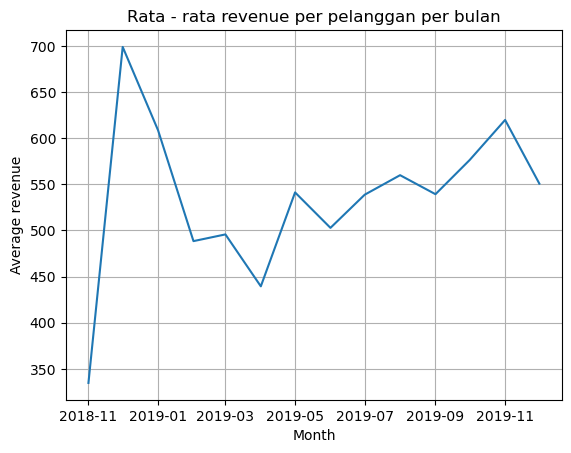

In [233]:
ax = sns.lineplot(data=revenue_user_month,
             x='invoice_month',
             y='average_revenue')
ax.set_xlabel('Month')
ax.set_ylabel('Average revenue')
ax.set_title('Rata - rata revenue per pelanggan per bulan')
ax.grid(True)

plt.show()

Dari grafik, dapat terlihat bahwa ketika mendekati akhir tahun, terjadi kenaikan revenue per pengguna, setelah itu terjadi penurunan hingga bulan keempat. Selanjutnya terjadi fluktuasi dengan cenderung terjadi kenaikan rata - rata revenue bulanan per pengguna.

### Analisis rentang produk

#### Pembuatan kategori produk

Selanjutnya akan dilakukan analisis rentang produk yang dimiliki. Pertama adalah merekap keseluruhan stock barang, harga, dan jumlah unit yang terjual. Diasumsikan bahwa harga barang yang diambil adalah rata - rata harga barang tersebut.

In [234]:
price = df_clean.groupby(['stock_code', 'description'])['unit_price'].mean().reset_index()
price

,stock_code,description,unit_price
0,10002,INFLATABLE POLITICAL GLOBE,1.108462
1,10080,GROOVY CACTUS INFLATABLE,0.411905
2,10120,DOGGY RUBBER,0.210000
3,10123C,HEARTS WRAPPING TAPE,0.650000
4,10124A,SPOTS ON RED BOOKCOVER TAPE,0.420000
...,...,...,...
4153,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,16.708889
4154,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,25.075714
4155,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,33.566667
4156,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,41.890000


Selanjutnya akan dilihat jumlah barang yang terjual

In [235]:
quantity = df_clean.groupby(['stock_code', 'description'])['quantity'].sum().reset_index()
quantity

,stock_code,description,quantity
0,10002,INFLATABLE POLITICAL GLOBE,414
1,10080,GROOVY CACTUS INFLATABLE,255
2,10120,DOGGY RUBBER,132
3,10123C,HEARTS WRAPPING TAPE,5
4,10124A,SPOTS ON RED BOOKCOVER TAPE,16
...,...,...,...
4153,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,10
4154,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,7
4155,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3
4156,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4


Selanjutnya kedua tabel akan disatukan dan akan ditambahkan total revenue dari setiap barang dengan mengalikan jumlah barang dengan harga barang

In [236]:
product = price.merge(quantity, on=['stock_code', 'description'], how='left')
product['revenue'] = product['unit_price'] * product['quantity']
product

,stock_code,description,unit_price,quantity,revenue
0,10002,INFLATABLE POLITICAL GLOBE,1.108462,414,458.903077
1,10080,GROOVY CACTUS INFLATABLE,0.411905,255,105.035714
2,10120,DOGGY RUBBER,0.210000,132,27.720000
3,10123C,HEARTS WRAPPING TAPE,0.650000,5,3.250000
4,10124A,SPOTS ON RED BOOKCOVER TAPE,0.420000,16,6.720000
...,...,...,...,...,...
4153,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,16.708889,10,167.088889
4154,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,25.075714,7,175.530000
4155,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,33.566667,3,100.700000
4156,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,41.890000,4,167.560000


Lalu dilihat median dan rata - rata nilai dari revenue

In [237]:
product.describe()

,unit_price,quantity,revenue
count,4158.000000,4158.000000,4158.000000
mean,8.918385,712.337903,2031.712928
std,206.315288,1257.562573,10177.884285
min,0.001000,1.000000,0.003000
25%,1.330833,40.000000,101.278684
50%,2.478020,237.000000,557.379203
75%,4.546029,831.000000,1793.200455
max,11062.060000,16670.000000,502400.752379


Dapat dilihat bahwa rata - rata dari total revenue per barang adalah 2031 dollar, dengan nilai mediannya adalah 557, yang menunjukan bahwa terdapat lebih banyak barang yang memberikan revenue kecil dibandingkan barang dengan revenue besar. Diasumsikan bahwa apabila revenue dibawah nilai median maka akan dikategorikan sebagai barang yang memberikan revenue rendah, barang diantara nilai median dan 3/4 quartil adalah barang dengan revenue sedang, dan sisanya adalah barang dengan revenue tinggi

In [238]:
#fungsi untuk memisahkan barang sesuai kategori
def revenue_category(rev):
    if rev < 557.38:
        return 'less profitable'
    elif  rev < 1793.2:
        return 'mid profitable'
    else:
        return 'high profitable'

In [239]:
product['category'] = product['revenue'].apply(revenue_category)
product.head()

,stock_code,description,unit_price,quantity,revenue,category
0,10002,INFLATABLE POLITICAL GLOBE,1.108462,414,458.903077,less profitable
1,10080,GROOVY CACTUS INFLATABLE,0.411905,255,105.035714,less profitable
2,10120,DOGGY RUBBER,0.210000,132,27.720000,less profitable
3,10123C,HEARTS WRAPPING TAPE,0.650000,5,3.250000,less profitable
4,10124A,SPOTS ON RED BOOKCOVER TAPE,0.420000,16,6.720000,less profitable


kolom `category` ini akan dipindahkan ke tabel yang berisi transaksi yang telah difilter

In [240]:
df_clean_category = pd.merge(df_clean, product[['description', 'category']], on='description', how='left')
df_clean_category.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_day,income,invoice_month,category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,15.30,2018-11-01,high profitable
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,15.30,2018-11-01,mid profitable
2,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34,2018-11-01,high profitable
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29,22.00,2018-11-01,high profitable
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34,2018-11-01,high profitable


In [241]:
df_clean_category.duplicated(subset=['invoice_no', 'stock_code', 'invoice_date', 'customer_id']).sum()

23131

Dari penyatuan tabel ini, terdapat nilai duplikat, hal ini dapat terlihat dari data indeks nomor 0 dan 1. Nilai duplikat ini akan dihapus

In [242]:
df_clean_category = df_clean_category.drop_duplicates(subset=['invoice_no', 'stock_code', 'invoice_date', 'customer_id']).reset_index(drop=True)
df_clean_category.duplicated().sum()

0

In [243]:
df_clean_category.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_day,income,invoice_month,category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,2018-11-29,15.30,2018-11-01,high profitable
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34,2018-11-01,high profitable
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,2018-11-29,22.00,2018-11-01,high profitable
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34,2018-11-01,high profitable
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,2018-11-29,20.34,2018-11-01,high profitable


Selanjutnya akan dipisahkan berdasarkan kategori

In [244]:
hi_profit = df_clean_category[df_clean_category['category'] == 'high profitable'].reset_index(drop=True)
mid_profit = df_clean_category[df_clean_category['category'] == 'mid profitable'].reset_index(drop=True)
low_profit = df_clean_category[df_clean_category['category'] == 'less profitable'].reset_index(drop=True)

#### Produk yang paling laris per kategori dan hubungannya

Selanjutnya akan dilihat apa saja produk yang terlaris dari masing - masing kategori. Akan dilihat 20 produk terlaris per kategori.

In [245]:
single_product_hi = hi_profit.groupby('description')['invoice_no'].count().sort_values(ascending=False)
single_product_mid = mid_profit.groupby('description')['invoice_no'].count().sort_values(ascending=False)
single_product_low = low_profit.groupby('description')['invoice_no'].count().sort_values(ascending=False)

In [246]:
single_product_hi.head(20)

description
REGENCY CAKESTAND 3 TIER              2065
WHITE HANGING HEART T-LIGHT HOLDER    1943
JUMBO BAG RED RETROSPOT               1832
PARTY BUNTING                         1554
LUNCH BAG RED RETROSPOT               1479
SET OF 3 CAKE TINS PANTRY DESIGN      1427
POSTAGE                               1250
LUNCH BAG  BLACK SKULL.               1234
NATURAL SLATE HEART CHALKBOARD        1229
ASSORTED COLOUR BIRD ORNAMENT         1215
PACK OF 72 RETROSPOT CAKE CASES       1204
JAM MAKING SET WITH JARS              1173
RECIPE BOX PANTRY YELLOW DESIGN       1135
LUNCH BAG SPACEBOY DESIGN             1131
JUMBO STORAGE BAG SUKI                1120
LUNCH BAG CARS BLUE                   1118
JUMBO SHOPPER VINTAGE RED PAISLEY     1116
JUMBO BAG PINK POLKADOT               1114
HEART OF WICKER SMALL                 1111
JAM MAKING SET PRINTED                1108
Name: invoice_no, dtype: int64

Dari daftar 20 barang terlaris untuk produk dengan profit yang tinggi, terlihat bahwa jumlah pembelian nya mencapai lebih dari 1000 buah per produk dalam rentang sekitar 1 tahun, atau sekitar 100 buah per bulan. Untuk hubungan barang - barang, dapat terlihat bahwa produk - produk yang paling laris memiliki deskripsi umum <b>bahan kue, kantung belanja, ornamen dengan bentuk cinta, barang - barang keperluan pesta, dan kantung bekal</b> Hal ini bisa menjadi pertimbangan lebih bagi Everyday Plus.

In [247]:
single_product_mid.head(20)

description
REX CASH+CARRY JUMBO SHOPPER         873
SMALL MARSHMALLOWS PINK BOWL         429
TOILET METAL SIGN                    396
ROBOT BIRTHDAY CARD                  345
SET 12 RETRO WHITE CHALK STICKS      342
PACK OF 12 SUKI TISSUES              341
COLOURING PENCILS BROWN TUBE         339
ENGLISH ROSE NOTEBOOK A7 SIZE        317
FANCY FONT BIRTHDAY CARD,            314
KEY FOB , BACK DOOR                  305
KITCHEN METAL SIGN                   299
CARD DOLLY GIRL                      298
AIRLINE LOUNGE,METAL SIGN            291
HANGING HEART MIRROR DECORATION      284
CARD CIRCUS PARADE                   281
WOOD STAMP SET THANK YOU             279
CARD SUKI BIRTHDAY                   279
SET OF 4 ENGLISH ROSE COASTERS       278
SET 12 COLOUR PENCILS SPACEBOY       274
PACK OF 12 RED RETROSPOT TISSUES     271
Name: invoice_no, dtype: int64

Untuk 20 barang terbanyak dengan profit yang sedang, dapat terlihat bahwa jumlah barang yang laku berada sekitar 800 - 250 buah per barang dalam rentang sekitar 1 tahun atau sekitar 20 - 75 buah per bulan. Dari deskripsi umum barang - barang diatas, hubungan produk - produk tersebut adalah <b>alat tulis, kartu ulang tahun, penanda ruangan, dan tisu dengan motif unik</b>. Terdapat pula barang dengan motif hati pada kategori ini.

In [248]:
single_product_low.head(20)

description
METAL SIGN,CUPCAKE SINGLE HOOK         232
SCOTTIE DOGS BABY BIB                  223
GOLD MINI TAPE MEASURE                 202
SLEEPING CAT ERASERS                   195
BEADED CRYSTAL HEART GREEN ON STICK    170
CHRISTMAS TREE STAR DECORATION         168
MINI LADLE LOVE HEART PINK             166
ENVELOPE 50 BLOSSOM IMAGES             154
CHRISTMAS TREE HEART DECORATION        154
BOUDOIR SQUARE TISSUE BOX              153
MINI LADLE LOVE HEART RED              151
CRAZY DAISY HEART DECORATION           150
RECYCLED PENCIL WITH RABBIT ERASER     141
PAINTED PINK RABBIT                    135
EMPIRE TISSUE BOX                      135
MAGIC DRAWING SLATE PURDEY             133
DISCO BALL CHRISTMAS DECORATION        133
CARAVAN SQUARE TISSUE BOX              133
PARTY TIME PENCIL ERASERS              133
KITTY PENCIL ERASERS                   131
Name: invoice_no, dtype: int64

Untuk 20 barang dengan profit yang rendah, dapat terlihat bahwa jumlah barang yang laku berada sekitar 230 - 130 buah per barang dalam rentang sekitar 1 tahun, atau sekitar 10 - 20 barang per bulan. Dari deskripsi umum barang - barang diatas, hubungan produk - produk tersebut adalah <b>alat tulis dengan motif unik, barang dengan motif hati, box tisu, dan dekorasi natal</b>. Walaupun terdapat produk yang laku hanya pada waktu - waktu tertentu saja seperti barang natal, namun dikarenakan rekapan data dari november 2018 hingga desember 2019, terdapat 2 waktu dimana barang tersebut merupakan barang yang paling dicari.

#### Proporsi per kategori

Terakhir akan dilihat seberapa besar proporsi per kategori. Akan dilihat jumlah barang yang terjual dan revenue yang dihasilkan.

In [249]:
category_count = df_clean_category.groupby('category')['quantity'].sum().sort_values(ascending=False)
category_count

category
high profitable    2022461
mid profitable      700081
less profitable     239359
Name: quantity, dtype: int64

In [250]:
category_sum = df_clean_category.groupby('category')['income'].sum().sort_values(ascending=False)
category_sum

category
high profitable    6080524.560
mid profitable      915476.870
less profitable     292443.723
Name: income, dtype: float64

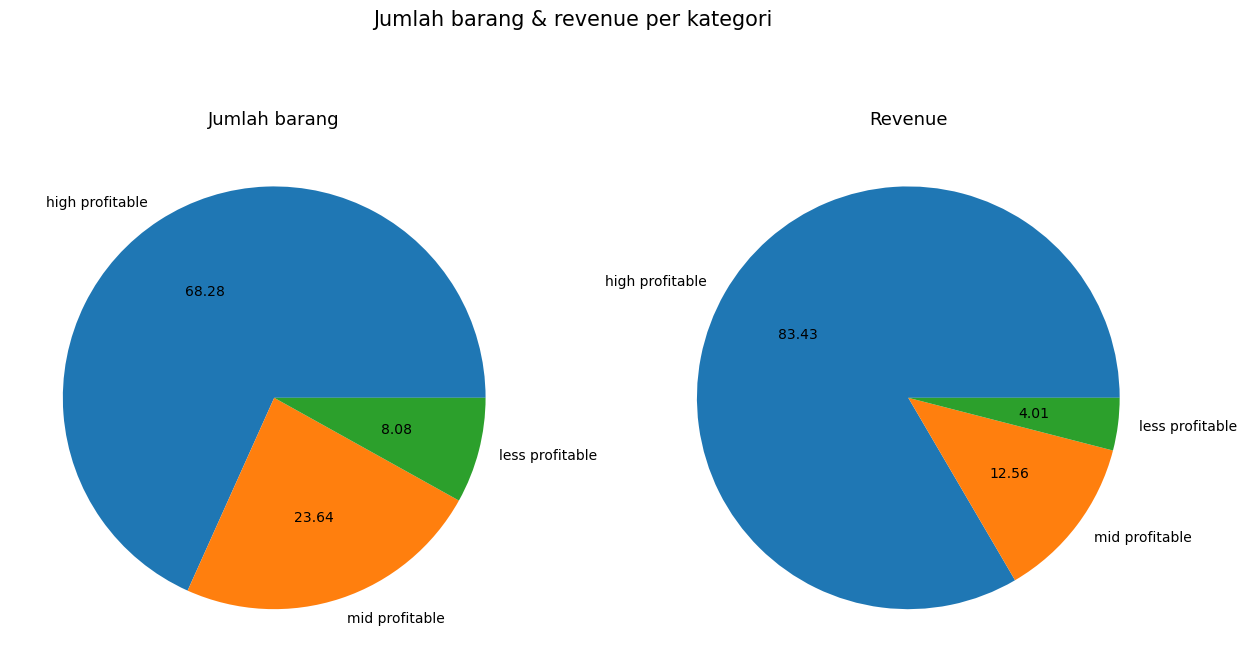

In [251]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Jumlah barang & revenue per kategori', fontsize=15)

axes[0].pie(category_count, labels=category_count.index, autopct='%.2f')
axes[0].set_title('Jumlah barang', fontsize=13)

axes[1].pie(category_sum, labels=category_sum.index, autopct='%.2f')
axes[1].set_title('Revenue', fontsize=13)


plt.show()

Dapat dilihat bahwa barang dengan profit tinggi memberikan kontribusi jumlah barang yang terjual sebanyak 68% dari total keseluruhan barang yang terjual namun memberikan revenue sebesar 83% dari revenue total. Untuk barang dengan profit menengah memberikan kontribusi jumlah barang yang terjual sebesar 24% dari total keseluruhan barang dengan revenue 13% dari total keseluruhan revenue. Untuk barang dengan profit rendah memberikan kontribusi jumlah barang yang terjual sebanyak 8% dari total keseluruhan barang yang terjual dan 4% revenue dari total keseluruhan revenue. Dari pengkategorian ini, terdapat kemungkinan bahwa walaupun barang yang terjual pada kategori menengan dan rendah cukup banyak, namun dikarenakan tidak banyak yang membeli sehingga revenue yang diberikan memiliki proporsi yang berbeda dengan produk yang memiliki profit tinggi.

## Menguji Hipotesis

Selanjutnya akan dilakukan pengujian hipotesis. Hipotesis yang akan diuji sebagai berikut:
- Terdapat perbedaan harga barang antara kategori produk dengan profit yang tinggi dengan kategori produk dengan profit yang sedang
- Terdapat perbedaan jumlah barang yang dibeli antara kategori produk dengan profit yang tinggi dengan kategori produk dengan profit yang sedang

### Perbedaan harga barang antar kategori

Pertama akan dilihat perbedaan harga barang antara kategori produk paling menguntungkan (`high profitable`) dan yang kurang menguntungkan (`mid profitable`). Hipotesis nol dan alternatifnya sebagai berikut:
- H0(hipotesis nol): Tidak ada perbedaan harga barang antara kategori produk dengan profit yang tinggi dengan kategori produk dengan profit yang sedang
- H1 (hipotesis altenatif): Terdapat perbedaan harga barang antara kategori produk dengan profit yang tinggi dengan kategori produk dengan profit yang sedang

Pertama akan dilihat ringkasan data harga untuk barang pada `high profitable` dan `mid profitable`

In [252]:
hi_profit['unit_price'].describe()

count    344016.000000
mean          6.127405
std         121.076838
min           0.080000
25%           1.650000
50%           2.550000
75%           4.950000
max       38970.000000
Name: unit_price, dtype: float64

In [253]:
mid_profit['unit_price'].describe()

count    110045.000000
mean          2.261672
std           4.144921
min           0.070000
25%           0.830000
50%           1.250000
75%           2.550000
max         649.500000
Name: unit_price, dtype: float64

Dapat dilihat bahwa rata - rata dari harga barang di `hi_profit` sekitar 6,12 dan untuk `mid_profit` adalah 2,26. Selanjutnya akan dilihat varians untuk kedua data diatas 

In [254]:
np.var(hi_profit['unit_price']),np.var(mid_profit['unit_price'])

(14659.558016216257, 17.180211719542957)

Variansi dari kedua data diatas berbeda jauh, dengan varians untuk `hi_profit` sekitar 14.659 dan untuk `mid_profit` sekitar 17,18. Hal ini dapat disebabkan karena nilai variansi adalah nilai kuadrat dari standar deviasi, dan standar deviasi yang dimiliki pada `hi_profit` lebih besar dibandingkan dengan `mid_profit` yang dapat disebabkan adanya perbedaan data dengan rata - rata yang cukup jomplang. Selanjutnya akan dilakukan t-test untuk menguji hipotesis

In [255]:
alpha = 0.05 
#nilai alpha adalah 0,05 yang menunjukan interval kepercayaan 95%. Memilih alpha 0,05 dikarenakan umumnya untuk menguji level kepercayaan pada nilai 95%
results = st.ttest_ind(hi_profit['unit_price'], mid_profit['unit_price'],
                      equal_var=False) #penggunaan equal var yang False karena perbedaan varians yang signifikan
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  6.232450012949803e-78
Kita menolak hipotesis nol


Dari t-test didapatkan hasil nilai p yang lebih kecil dibandingkan dengan nilai signifikansi alfa yang bernilai 0,05. Sehingga disimpulkan bahwa <b>Terdapat perbedaan harga barang antara kategori produk paling menguntungan dengan kategori produk yang kurang menguntungkan<b>.

### Perbedaan jumlah barang antar kategori

Lalu akan dilihat perbedaan jumlah barang antara kategori produk paling menguntungkan (`high profitable`) dan yang kurang menguntungkan (`mid profitable`). Hipotesis nol dan alternatifnya sebagai berikut:
- H0 (hipotesis nol): Tidak ada perbedaan jumlah barang yang dibeli antara kategori produk dengan profit yang tinggi dengan kategori produk dengan profit yang sedang
- H1 (hipotesis alternatif): Terdapat perbedaan jumlah barang yang dibeli antara kategori produk dengan profit yang tinggi dengan kategori produk dengan profit yang sedang

Pertama akan dilihat ringkasan data harga untuk barang pada `high profitable` dan `mid profitable`

In [256]:
hi_profit['quantity'].describe()

count    344016.000000
mean          5.878974
std           6.057986
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max          28.000000
Name: quantity, dtype: float64

In [257]:
mid_profit['quantity'].describe()

count    110045.000000
mean          6.361770
std           6.988449
min           1.000000
25%           1.000000
50%           3.000000
75%          12.000000
max          28.000000
Name: quantity, dtype: float64

Dari deskripsi data, dapat terlihat rata - rata jumlah barang yang terjual untuk `hi_profit` sekitar 5,88 dan untuk `mid_profit` sekitar 6,36. Perbedaan ini tidak terlalu signifikan dikarenakan jumlah barang telah dilakukan pemfilteran untuk memfilter transaksi yang diatas nilai outlier. Lalu akan dilihat nilai varians nya

In [258]:
np.var(hi_profit['quantity']),np.var(mid_profit['quantity'])

(36.69908977494494, 48.837971440507616)

Dapat dilihat bahwa nilai varians untuk `hi_profit` adalah 36,7 dan untuk `mid_profit` adalah 48,8. Terdapat perbedaan sekitar 12%. Lalu akan dilakukan t-test untuk menguji hipotesis

In [259]:
alpha = 0.05 
#nilai alpha adalah 0,05 yang menunjukan interval kepercayaan 95%. Memilih alpha 0,05 dikarenakan umumnya untuk menguji level kepercayaan pada nilai 95%
results = st.ttest_ind(hi_profit['quantity'], mid_profit['quantity'],
                      equal_var=False) #penggunaan equal var yang False karena perbedaan varians yang signifikan
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  5.724170511994945e-94
Kita menolak hipotesis nol


Dari t-test, didapat bahwa nilai p jauh lebih kecil dibandingkan dengan nilai signifikansi alfa, sehingga dapat disimpulkan bahwa <b>Terdapat perbedaan jumlah barang yang dibeli antara kategori produk paling menguntungkan dengan kategori produk yang kurang menguntungkan</b>

## Kesimpulan

Dari kegiatan analisa ini didapat berbagai kesimpulan, yakni:
- Data telah dilakukan pemrosesan, baik dari pengubahan judul kolom, pengubahan tipe data, pemrosesan nilai yang hilang, pemrosesan nilai duplikat, dan pemfilteran nilai outlier untuk pembelian jumlah barang diatas batas atas outlier
- Dari revenue harian didapat bahwa dari akhir tahun 2018 hingga awal tahun 2019 terjadi penurunan revenue, namun setelah itu revenue harian cenderung stabil dengan tren menaik. Revenue tertinggi jatuh pada 5 Desember 2018 dan 3 Desember 2019
- Dari rata - rata besar pembelian per penguna dapat dilihat jumlah barang yang dibeli cenderung stabil, dengan terdapat beberapa tanggal yang menunjukan anomali jumlah pembelian.
- Dari rata - rata revenue bulanan terhadap jumlah pengguna dapat terlihat bahwa menuju akhir tahun 2018, terjadi kenaikan revenue, namun setelah itu terjadi penurunan hingga bulan 4 tahun 2019, lalu mulai terjadi kenaikan revenue
- Barang yang memberikan profit yang tinggi termasuk dalam kategori umum <b>bahan kue, kantung belanja, ornamen dengan bentuk hati, barang - barang keperluan pesta, dan kantung bekal</b>, untuk barang dengan profit sedang termasuk dalam kategori umum <b>alat tulis, kartu ulang tahun, penanda ruangan, dan tisu dengan motif unik</b>, dan barang dengan profit rendah termasuk dalam kategori umum <b>alat tulis dengan motif unik, barang dengan motif hati, box tisu, dan dekorasi natal</b>.
- Proporsi jumlah barang yang dijual untuk barang dengan profit sedang dan profit rendah terhadap revenue yang diberikan berbanding terbalik dengan barang yang memiliki profit tinggi.
- Terdapat perbedaan rata - rata harga barang antara kategori produk dengan profit tinggi dengan produk dengan profit sedang. Selain itu pula terdapat perbedaan rata - rata jumlah barang yang dijual antara kategori produk dengan profit tinggi dengan produk dengan profit sedang.

Kedepannya, untuk Everyday Plus, agar kegiatan analisa akan kategori produk bisa semakin lebih detail dan menyeluruh,  terdapat beberapa saran dan rekomendasi:
- Memastikan bahwa data hanya mengandung transaksi penjualan saja
- Memastikan bahwa tidak ada nilai yang mengandung nilai negatif
- Menambahkan kategori umum terhadap barang - barang dijual agar pengkategorian produk semakin gampang

Dan untuk meningkatkan profit, berikut adalah saran yang diberikan kepada Everyday Plus:
- Barang - barang yang memiliki profit sedang atau rendah bisa diberikan insentif, seperti pemberian diskon, beli 2 lebih hemat, paket kombo dengan barang yang memiliki profit tinggi, sehingga bisa meningkatkan jumlah barang yang terjual
- Melakukan marketing pada mendekati akhir tahun, dikarenakan kecenderungan pengguna untuk melakukan pembelian barang pada akhir tahun
- Mengenal lebih intensif deskripsi pengunjung yang mengunjungi Everyday Plus (usia, jenis kelamin, pendapatan, keperluan belanja) untuk bisa memberikan promosi spesifik untuk tipe pengunjung tertentu.